In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, optimize

In [2]:
np.random.seed(123456)

In [3]:
sigma = 0.15
mu = 2

In [4]:
law = stats.lognorm(s=sigma, scale=np.exp(mu))

In [5]:
N = 30_000
x = law.rvs(size=N)

In [6]:
density, bins = np.histogram(x, density=1., bins=30)
centers = (bins[1:] + bins[:-1]) / 2.

In [7]:
stats.lognorm.fit(x)

(0.151297129052073, 0.053788977866467386, 7.335249847775119)

In [8]:
def model(x, mu, sigma):
    return stats.lognorm.pdf(x, s=sigma, scale=np.exp(mu))

In [9]:
popt, pcov = optimize.curve_fit(model, centers, density)
popt, pcov

(array([2.00059957, 0.15158351]),
 array([[8.87310596e-07, 4.50003479e-08],
        [4.50003479e-08, 5.93772296e-07]]))

In [23]:
def factory(x):
    def wrapped(p):
        return - np.sum(stats.lognorm.logpdf(x, s=p[1], scale=np.exp(p[0])))
    return wrapped

In [24]:
likelihood = factory(x)

In [25]:
sol = optimize.minimize(likelihood, x0=[1, 1])
sol

      fun: 45693.61136284961
 hess_inv: array([[ 3.38213795e-08, -1.68343490e-08],
       [-1.68343490e-08,  5.54538464e-07]])
      jac: array([-0.00048828,  0.00097656])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 66
      nit: 17
     njev: 22
   status: 2
  success: False
        x: array([2.00008072, 0.15018327])

In [12]:
xlin = np.linspace(x.min(), x.max(), 100)

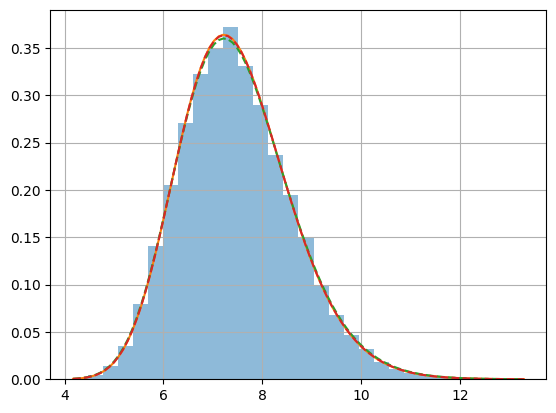

In [17]:
fig, axe = plt.subplots()
_ = axe.hist(x, bins=30, density=1., alpha=0.5)
axe.plot(xlin, law.pdf(xlin))
axe.plot(xlin, model(xlin, *popt), "--")
axe.plot(xlin, model(xlin, *sol.x), "--")
axe.grid()